## Hands-on 3A
### Regression
#### Build a regression model to estimate the weight based on height

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
from pandas import read_csv, get_dummies
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression

df = read_csv('heights_weights_genders.csv')
df

,Height(cm),Weight(kg),Gender
0,187.6,109.7,Male
1,174.7,73.6,Male
2,188.2,96.5,Male
3,182.2,99.8,Male
4,177.5,93.6,Male
...,...,...,...
9995,168.1,62.0,Female
9996,170.4,77.5,Female
9997,162.2,58.3,Female
9998,175.3,74.3,Female


In [3]:
X1 = df.values[:, 0].reshape(-1, 1)
y1 = df.values[:, 1]
X1_train, X1_test, y1_train, y1_test = split(X1, y1, random_state=42)

lr1 = LinearRegression().fit(X1_train, y1_train)
print(f'R2 score: {lr1.score(X1_test, y1_test)}')

h = eval(input('Enter height: '))
print(f'Estimated weight is: {lr1.predict([[h]])}kg')

R2 score: 0.8573115456970967
Enter height: 175
Estimated weight is: [82.03843622]kg


To do: Build another regression model to estimate the weight based on height and gender

In [10]:
df2 = get_dummies(df, drop_first=True)
print(df2.head())
y2 = df2['Weight(kg)'].values
del df2['Weight(kg)']
X2 = df2.values
print(X2.shape, y2.shape)
X2_train, X2_test, y2_train, y2_test = split(X2, y2, random_state=42)

lr2 = LinearRegression().fit(X2_train, y2_train)
print(f'lr2 score: {lr2.score(X2_test, y2_test)}')

h = eval(input('Enter height: '))
g = eval(input('Enter gender (0 for female, 1 for male): '))
print(f'Estimated weight is: {lr2.predict([[h, g]])}kg')

   Height(cm)  Weight(kg)  Gender_Male
0       187.6       109.7            1
1       174.7        73.6            1
2       188.2        96.5            1
3       182.2        99.8            1
4       177.5        93.6            1
(10000, 2) (10000,)
lr2 score: 0.9026663813060709
Enter height: 175
Enter gender (0 for female, 1 for male): 1
Estimated weight is: [84.45653817]kg


## Hands-on 3B 
### Classification
#### Build 3 classification models for breast cancer detection

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split as split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA

cancer = load_breast_cancer()
feature_names = cancer.feature_names
target_names = cancer.target_names
X = cancer.data
y = cancer.target

To do: Check the number of features in the dataset

In [14]:
print(f'Number of feature: {X.shape[1]}')

Number of feature: 30


To do: Evaluate the performance of k-Nearest Neighbors, Logistic Regression and Decision Tree on this dataset using 5-fold cross validation.

In [15]:
kfold = KFold(5, shuffle=True, random_state=42)
models = []
models.append(('knn', KNeighborsClassifier()))
models.append(('lgr', LogisticRegression()))
models.append(('dtc', DecisionTreeClassifier()))

for n, m in models:
    scores = cross_val_score(m, X, y, cv=kfold, n_jobs=-1)
    print(f'{n} mean score: {scores.mean()}, std dev: {scores.std()}')

knn mean score: 0.936686849868033, std dev: 0.02809807834514385
lgr mean score: 0.9419655333022823, std dev: 0.033652071581884734
dtc mean score: 0.9367644775655954, std dev: 0.011508876248377273


To do: Use Univariate Selection to select 10 best features. Evaluate the performance of k-Nearest Neighbors, Logistic Regression and Decision Tree on these features using 5-fold cross validation.

In [18]:
selector = SelectKBest(k=10)
selector.fit(X, y)
X2 = selector.transform(X)
print(X2.shape)

for n, m in models:
    scores = cross_val_score(m, X2, y, cv=kfold, n_jobs=-1)
    print(f'{n} mean score: {scores.mean()}, std dev: {scores.std()}')

(569, 10)
knn mean score: 0.9296693060083838, std dev: 0.027839028415963876
lgr mean score: 0.9401956217978574, std dev: 0.034057832166776575
dtc mean score: 0.9226362366092221, std dev: 0.016286475951605383


To do: Use Principle Component Analysis (PCA) to reduce the dimensionality of the original features to 10. Evaluate the performance of k-Nearest Neighbors, Logistic Regression and Decision Tree on these features using 5-fold cross validation.

In [19]:
pca = PCA(n_components=10)
X3 = pca.fit_transform(X)
print(X3.shape)

for n, m in models:
    scores = cross_val_score(m, X3, y, cv=kfold, n_jobs=-1)
    print(f'{n} mean score: {scores.mean()}, std dev: {scores.std()}')

(569, 10)
knn mean score: 0.936686849868033, std dev: 0.02809807834514385
lgr mean score: 0.9542617605961807, std dev: 0.015294618659067174
dtc mean score: 0.9191429902189101, std dev: 0.031124373982443915


## Hands-on 3C
### Clustering
#### Construct a model to group the truck drivers

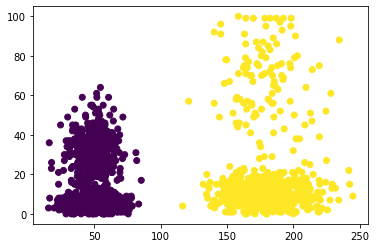

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Read dataset
df = pd.read_csv('drivers.csv', sep='\t', header=0)

# Store features (Column 1 & 2)
X = df.iloc[:, 1:].values

# Apply k-mean clustering with 2 clusters
km = KMeans(n_clusters=2).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=km.labels_)
plt.show()

To do: To group the truck drivers into 4 clusters and label the data samples according to their cluster

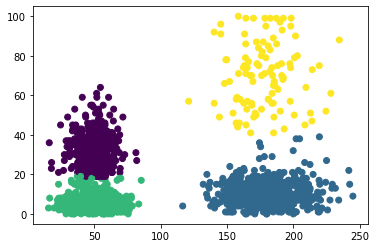

In [21]:
# Apply k-mean clustering with 2 clusters
km = KMeans(n_clusters=4).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=km.labels_)
plt.show()

To do: Add labels to df and save it as a CSV file

In [22]:
df['Label'] = km.labels_
df.to_csv('labelled_drivers.csv', index=False)